# USA

## Libraries and data

In [1]:
# General libraries
import pandas as pd
import numpy as np

# To plot
import altair as alt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [99]:
# Parameters
my_folder = "../names/USA/"
# years = np.arange(2000, 2020)
years = np.arange(1995, 2020)

# Open the file
df = pd.DataFrame()
for y in years:
    aux = pd.read_csv(my_folder + 'yob' + str(y) + '.txt', 
                     header=None).rename(columns={0:'Name', 1:'Gender', 2:"Counts"})
    aux['Year'] = y
    df = pd.concat([df, aux])

In [100]:
# Group by most repeated Female names and order them
df_2 = df.groupby(['Name', 'Gender'])[['Counts']].sum().reset_index()
df_2 = df_2[df_2['Gender']=='F'].sort_values(by='Counts', ascending=False).reset_index()

# merge original database with most repeated names
df_3 = pd.merge(df_2['Name'].head(10), df, how="inner", on=["Name", "Name"])

### Top 10 names in the USA, in last 20 years

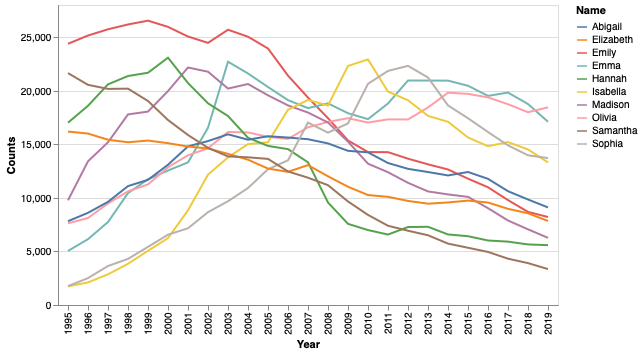

In [101]:
alt.Chart(df_3[df_3.Gender=="F"]).mark_line().encode(
    alt.X("Year:O"),
    alt.Y("Counts"),
    alt.Color("Name"),
    tooltip = ['Name', 'Year', 'Counts']
)

### Our selected names

In [102]:
names = ['Macarena', 'Elisa', 'Victoria', 'Gina', 'Aisha', 'Carlina']
pd.DataFrame(names)

,0
0,Macarena
1,Elisa
2,Victoria
3,Gina
4,Aisha
5,Carlina


In [103]:
# merge original database with most repeated names
df_3 = pd.merge(pd.DataFrame(names).rename(columns={0:"Name"}), df, how="inner", on=["Name", "Name"])

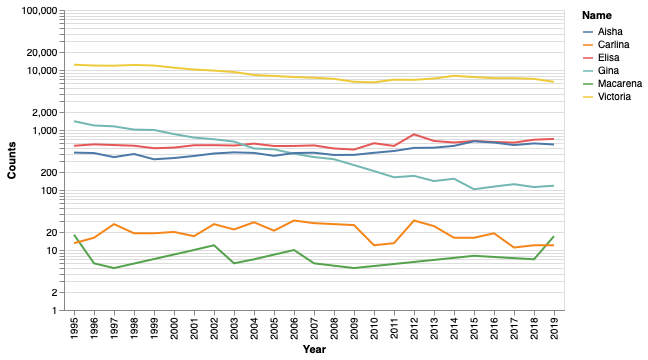

In [104]:
alt.Chart(df_3[df_3.Gender=="F"]).mark_line().encode(
    alt.X("Year:O"),
    alt.Y("Counts", scale=alt.Scale(type='log')),
    alt.Color("Name"),
    tooltip = ['Name', 'Year', 'Counts']
)